# Unemployment Analysis

###  Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
df=pd.read_csv('Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Understanding Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


###  Checking Dataset Shape

In [4]:
df.shape

(768, 7)

###  Displaying Column Names

In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

###  Statistical Summary

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


###  Checking Missing Values

In [7]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

###  Visualizing Missing Data (Before Cleaning)

<Axes: >

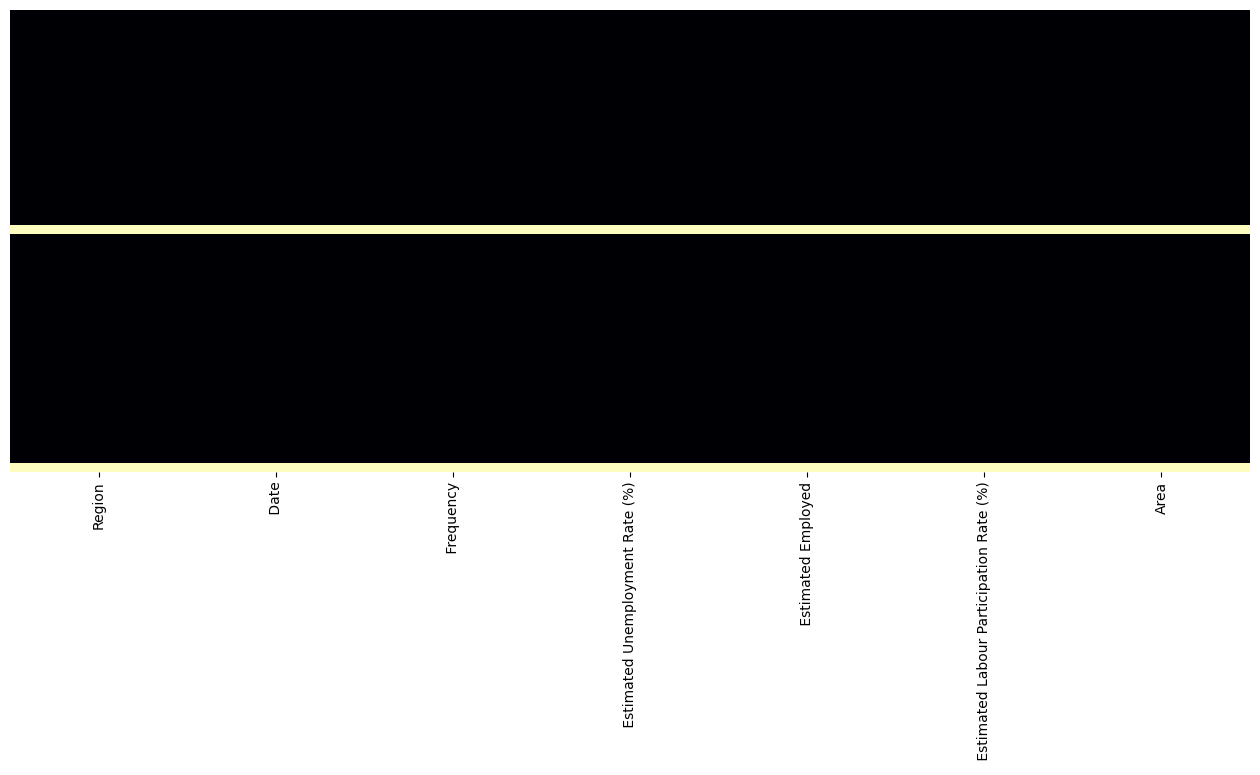

In [8]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='magma')

###  Removing Missing Values

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

###  Visualizing Missing Data (After Cleaning)

<Axes: >

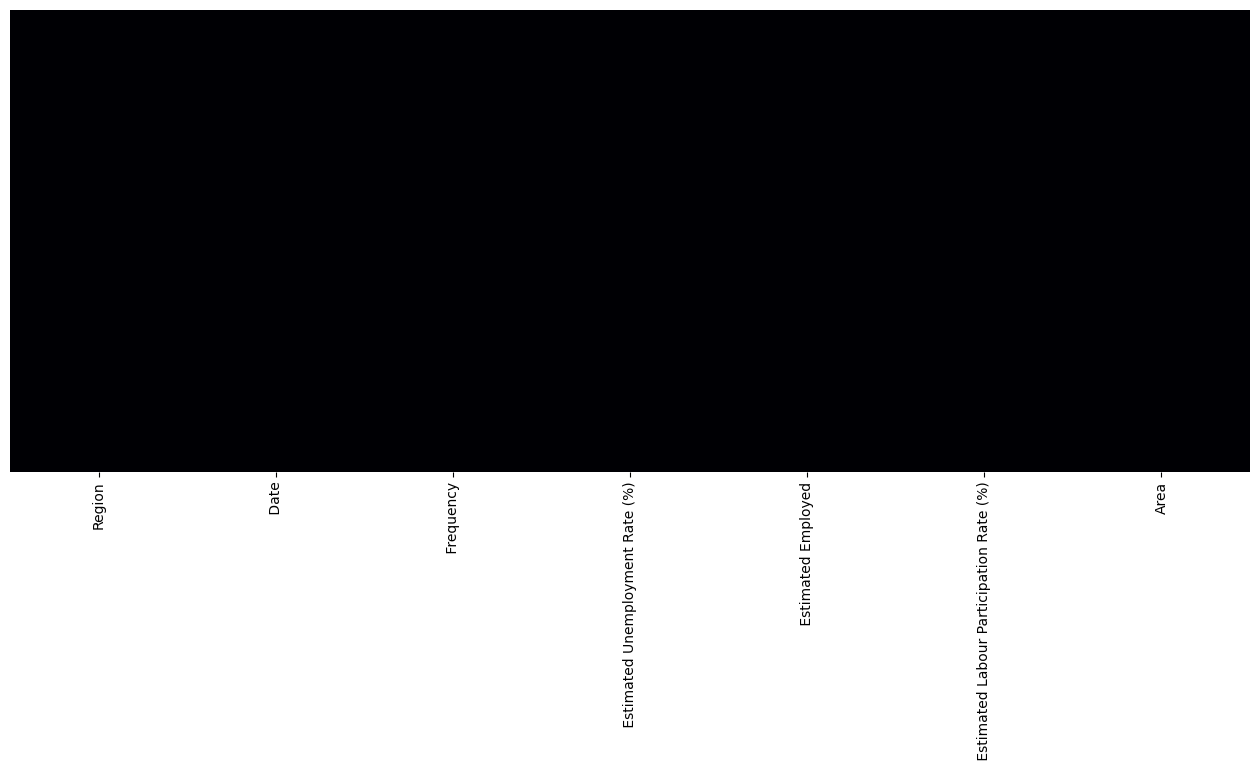

In [11]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='magma')

### Data Type Conversion and Feature Engineering

- Converted 'Area' to categorical type to optimize memory usage.
- Converted the 'Date' column to datetime format.
- Extracted the month name from the month column for easier interpretation.

In [12]:
import calendar
df['Area'] = df['Area'].astype('category')
df[' Date'] = pd.to_datetime(df[' Date'])
df[' Year'] = df[' Date'].dt.year
df['Month'] = df[' Date'].dt.month
df['Month_in_wordings'] = df['Month'].apply(lambda x : calendar.month_abbr[x])


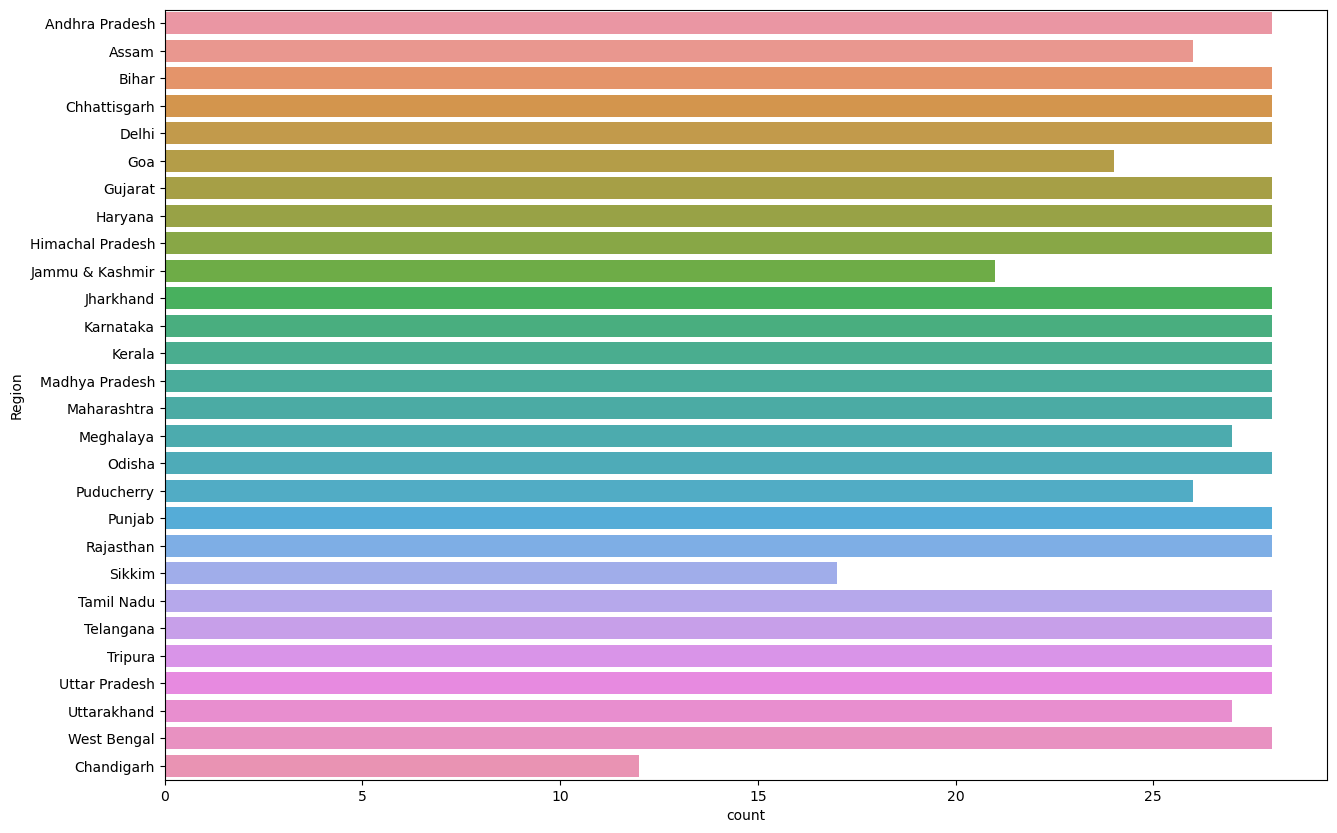

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(y='Region' , data=df)
plt.show()

###  Identifying Highest and Lowest Unemployment Regions

In [14]:
avg_unemployment_rate=df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()

In [15]:
print(f"State with High Employment : {state_with_highest_unemployment}")
print(f"High Employment Rate : {high_unemployment_rate}")
print('-----------------------------------------')
print(f"State  with  Low Employment : {state_with_lowest_unemployment}")
print(f"Low Employment Rate : {low_unemploy_rate}")

State with High Employment : Tripura
High Employment Rate : 28.350357142857142
-----------------------------------------
State  with  Low Employment : Meghalaya
Low Employment Rate : 4.7988888888888885


### Bar Plot: Average Unemployment Rate by Region

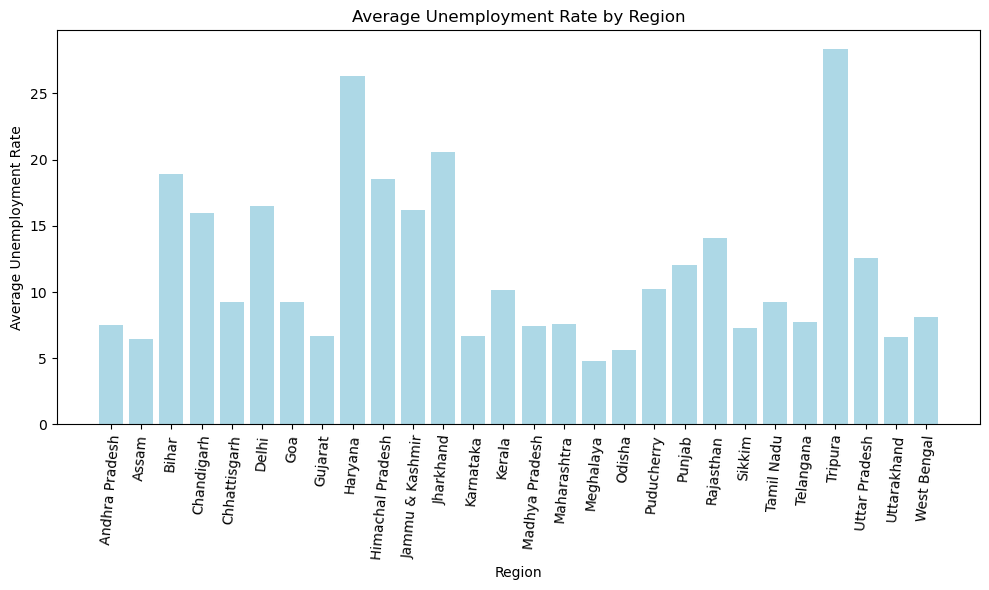

In [16]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='lightblue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=85)  
plt.tight_layout()  
plt.show()

### Box Plot: Unemployment Rate by Year

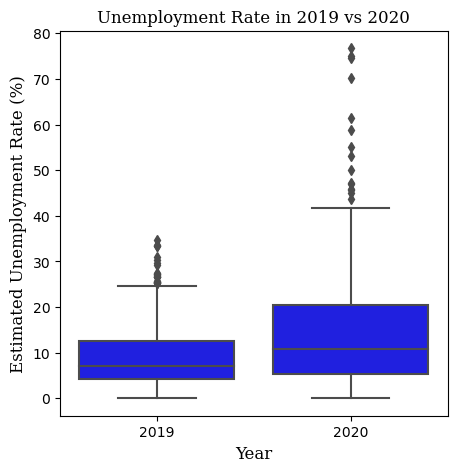

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(y = df[' Estimated Unemployment Rate (%)'], x = df[' Year'], color ='blue')
plt.style.use('default')
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Unemployment Rate in 2019 vs 2020', fontdict=font)
plt.show()

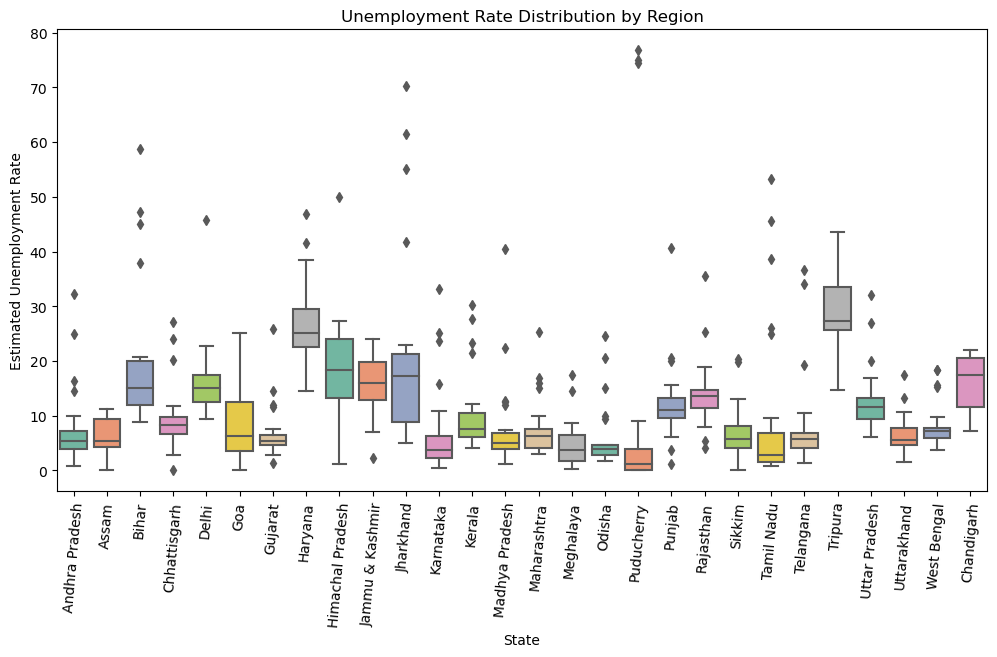

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df,palette="Set2")
plt.title("Unemployment Rate Distribution by Region")
plt.xlabel("State")
plt.ylabel("Estimated Unemployment Rate")
plt.xticks(rotation=85)
plt.show()

### Distribution of Unemployment Rate

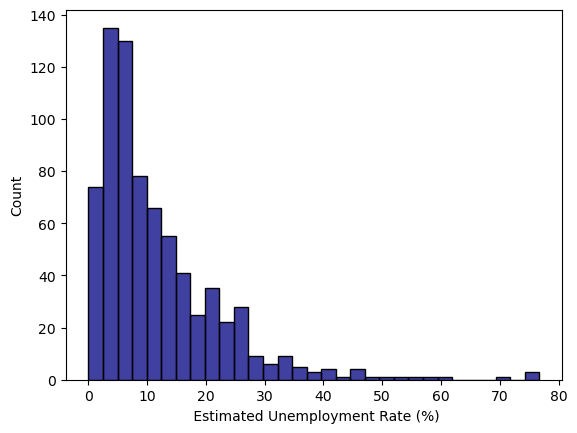

In [19]:
sns.histplot(data=df, x=" Estimated Unemployment Rate (%)",color="navy")
plt.show()

### Distribution of Estimated Employment

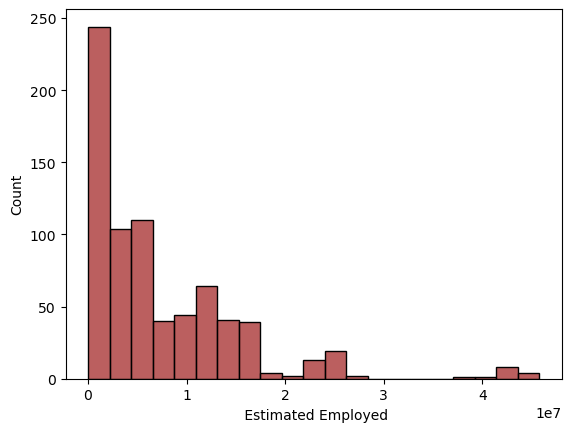

In [20]:
sns.histplot(data=df, x=" Estimated Employed",color="brown")
plt.show()

###  Urban vs Rural Area Distribution

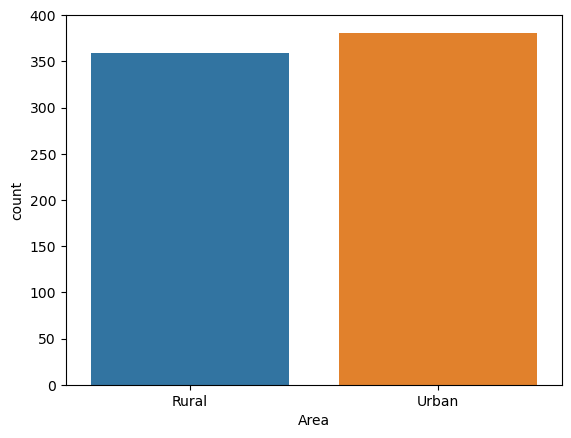

In [21]:
sns.countplot(x="Area",data=df)
plt.show()

### Comparision of Pre and Post Covid

In [23]:
df.loc[:, 'Covid_Period'] = np.where(df[' Date'] >= '2020-03-01', 'Post-Covid', 'Pre-Covid')
print(df[[' Date', 'Covid_Period']].head())

        Date Covid_Period
0 2019-05-31    Pre-Covid
1 2019-06-30    Pre-Covid
2 2019-07-31    Pre-Covid
3 2019-08-31    Pre-Covid
4 2019-09-30    Pre-Covid


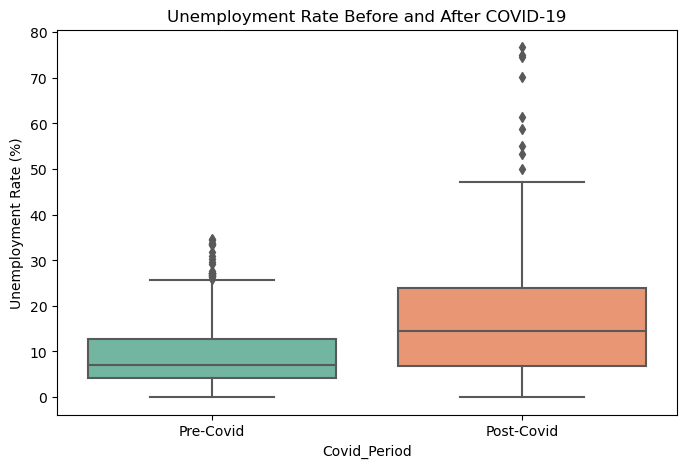

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Covid_Period', y=' Estimated Unemployment Rate (%)', palette='Set2')
plt.title("Unemployment Rate Before and After COVID-19")
plt.ylabel("Unemployment Rate (%)")
plt.show()

## Summary

From this analysis, I observed that the unemployment trends across different regions and time periods.  
The dataset was cleaned, missing values were removed, and key features such as month names were extracted.

Key Insights:
- The unemployment rate varies across regions.
- The unemployment distribution is **right-skewed**, meaning most unemployment values are low, with few very high values.
- The comparison between years (2019 vs 2020) shows possible economic impact (such as COVID-19).
- Urban and Rural areas exhibit different patterns in employment and unemployment.


 Overall this helps me understand unemployment patterns over time,which helps me to understand the economic awareness.